<a href="https://colab.research.google.com/github/KuvinaDesch/MAT421/blob/main/ModH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

When it comes to ODE solving methods, there are 2 main types of errors to consider.  Accuracy tells you how far from the exact answer your prediction will be.  The exact answer is unknown, but we can still estimate the accuracy error using big O notation in terms of h.  The other error is instability.  It is possible for the error to grow as time progresses forward.  This is called instability.  

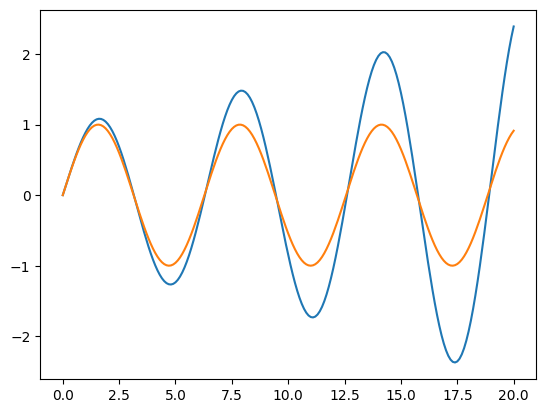

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# now we will look at an example
# step size 0.1
h = 0.1
# we'll look at x 0 to 20
x = np.arange(0, 20+h, h)
# make a numpy array for y
y = np.zeros(len(x))
# initial value
y[0] = 0
# this is second order, so we also make one for dy/dx
yp = np.zeros(len(x))
# initial value
yp[0] = 1

# go through the whole list
for i in range(0,len(y)-1):
  # this differential equation is simply y'' = -y
  # linearizing it, we use x = y'
  # we get x' = -y and y' = x
  # now we use euler's method to calculate both
  yp[i+1] = yp[i] + h * (-y[i])
  y[i+1] = y[i] + h * yp[i]

# the actual function is just y=sinx, but ours ends up with a growing instability
plt.plot(x,y)
plt.plot(x, np.sin(x))

Instead of Euler's method, we can use something called the Runge Kutta methods.  There are multiple levels of Runge Kutta methods.  The first is level 2.  If the slope is positive and also incresing, then Euler's method will underestimate the next point.  If instead of the slope at xi, you use the slope at xi+1, it will overestimate.  What you can do is use the average of the 2.  Since the slope often depends on the value of the function itself, your prediction of that value at xi+1 can affect your second slope value.

RK4 takes it a step further.  Essentially, you break the interval h in half.  First you approximate the midpoint value.  Then use that approximation to make another approximation of the midpoint value.  Find the midpoint slope using that and then use that to predict the final value.

Instead of going through the process every time, we can use scipy to integrate for us.

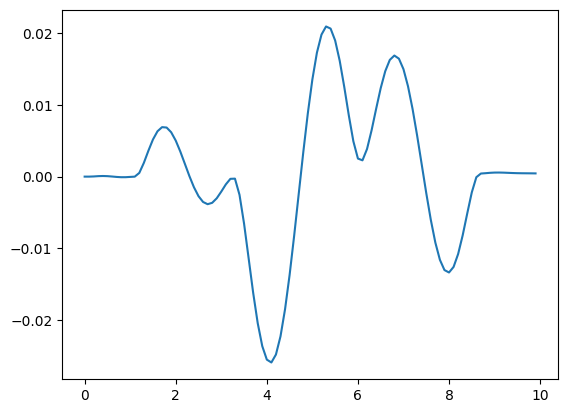

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# define our slope function.  This one only depends on t
def f(t, y):
  return 2*np.sin(t)

# step
h = 0.1
# t values
t = np.arange(0, 10, h)
# scipy takes the function, domain of integration, initial value
# and values on which to evaluate
s = solve_ivp(f, [0, 10], [0], t_eval = t)

# we can see the error compared to the actual solution is very small
plt.plot(s.t, s.y[0] + 2*np.cos(t) - 2)